In [20]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report

In [7]:
df=pd.read_csv("./data_banknote_authentication.csv")
df.head()
X=df.drop("Class",axis=1)
Y=df["Class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [16]:
n_estimators=[50,100,150,200]
boostraping=[True,False]
obb=[False,True]
max_features=[2,3,4]
param_grid={"n_estimators":n_estimators,"bootstrap":boostraping,"oob_score":obb,"max_features":max_features}
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,param_grid=param_grid)
grid.fit(X_train,y_train)

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [False, True]})

In [18]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 200, 'oob_score': False}

In [14]:
predictions=grid.predict(X_test)

In [15]:
confusion_matrix(y_test,predictions)

array([[77,  0],
       [ 1, 60]])

In [22]:
error=[]
miss_match=[]
for i in range(1,200):
    rfc=RandomForestClassifier(n_estimators=i,bootstrap=True,max_features=3)
    rfc.fit(X_train,y_train)
    predictions=rfc.predict(X_test)
    error.append(1-accuracy_score(y_test,predictions))
    miss_match.append(np.sum(predictions!=y_test))
    
    
    

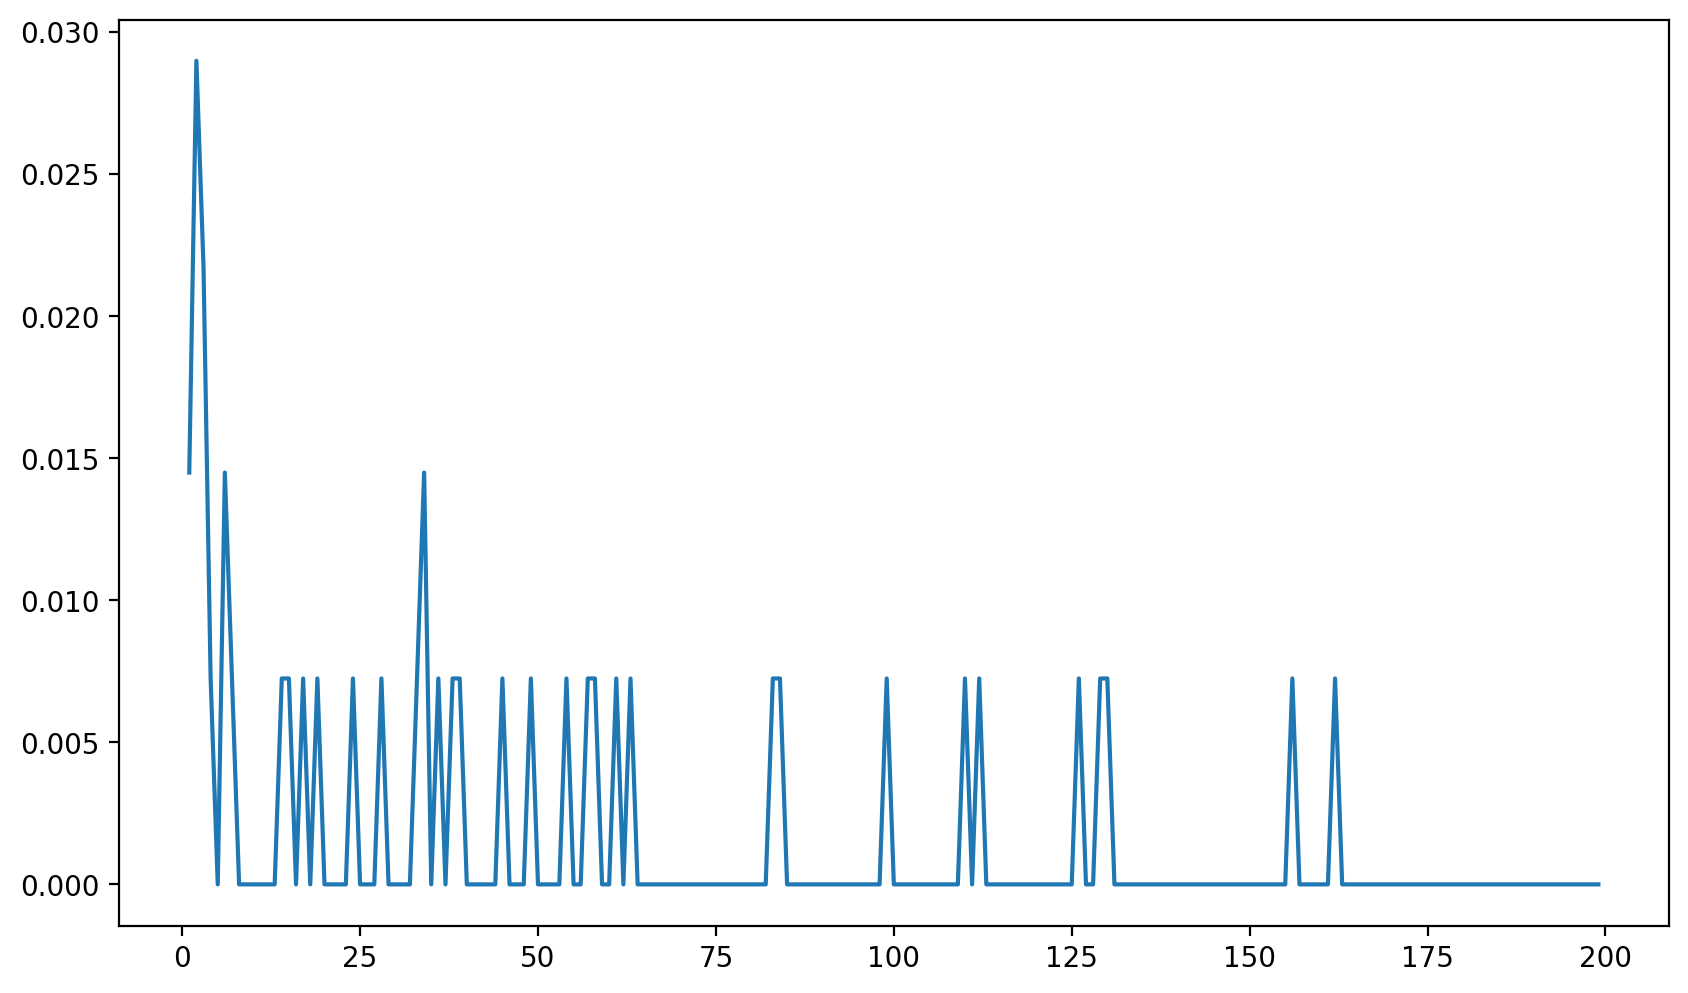

In [27]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,200),error);

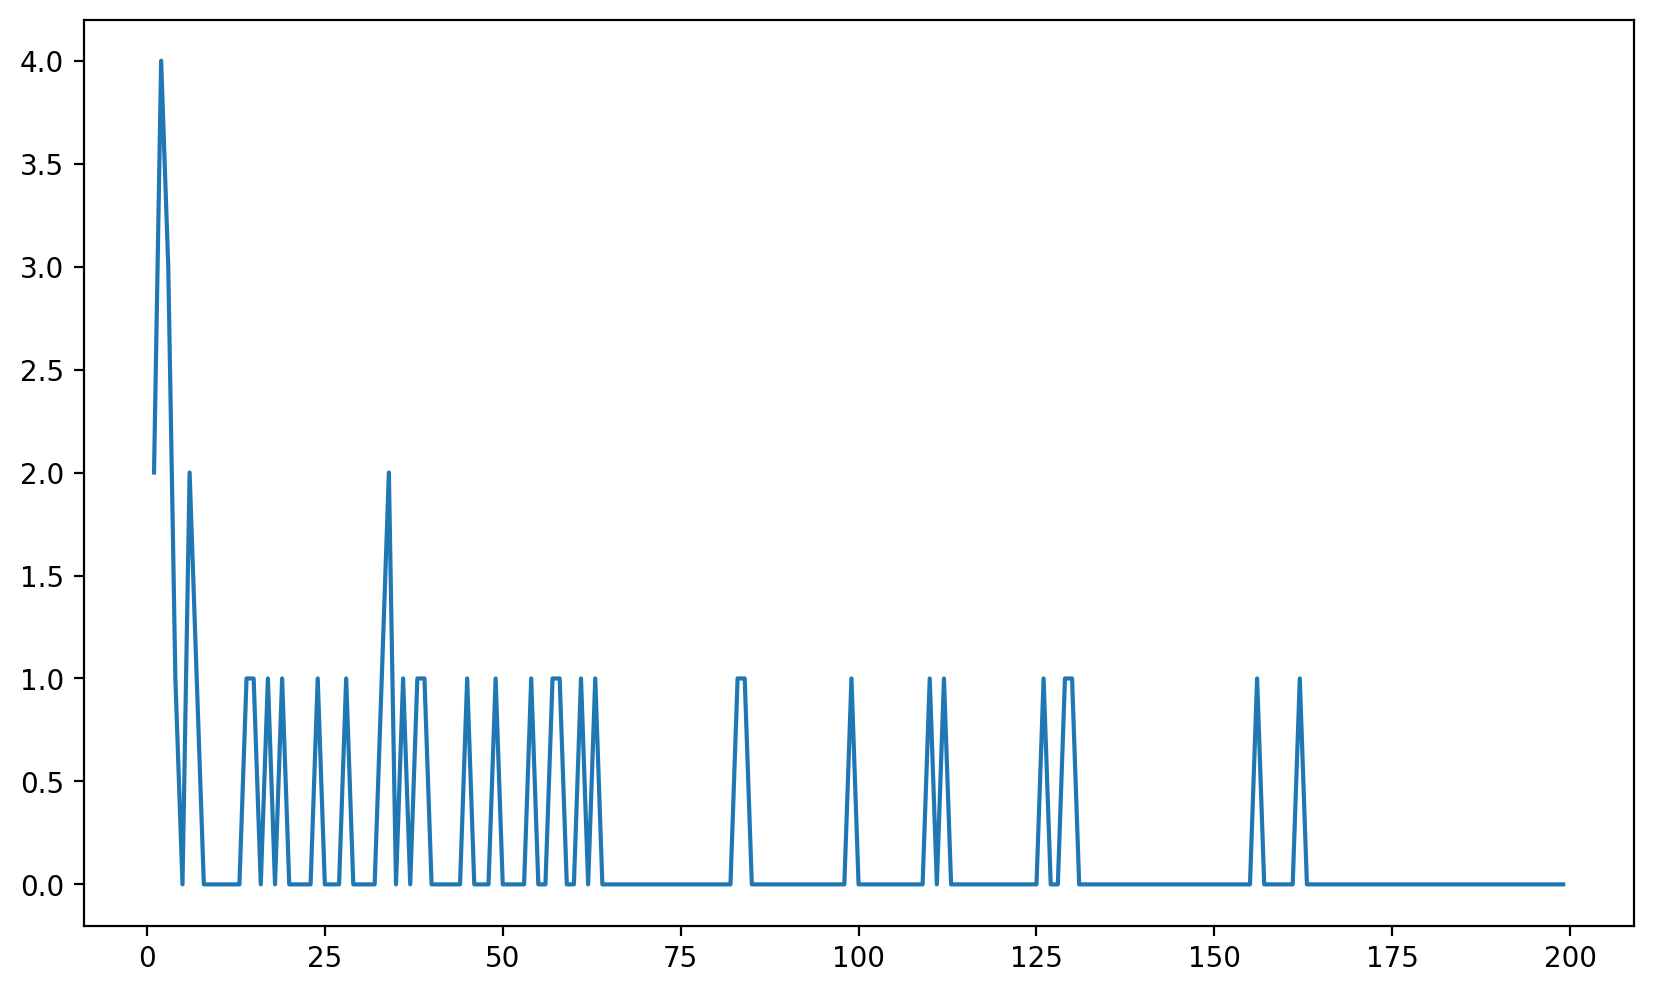

In [29]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,200),miss_match);